# Excersise 1

In [24]:
import seaborn as sns
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

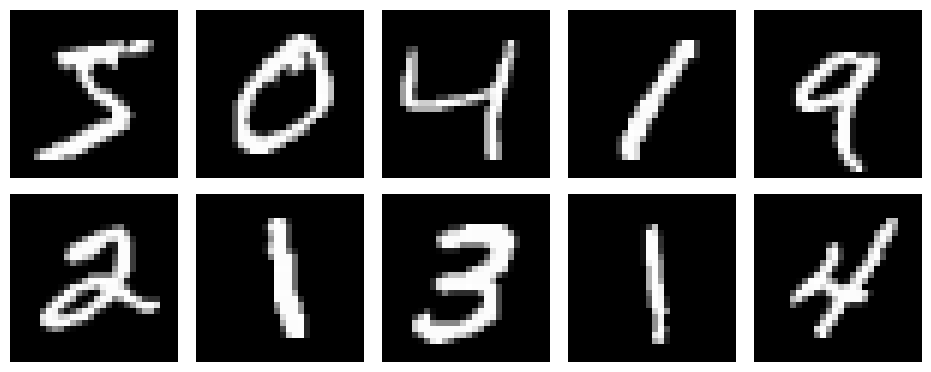

In [25]:
# A)
import matplotlib.pyplot as plt

def display_images(data, nrows= 2, ncols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap="gray")
        ax.axis("off")
    
    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0 )

display_images(X_train)

In [26]:
# B)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [27]:
# C)
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=8, batch_size=64)

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8865 - loss: 0.3639
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9857 - loss: 0.0468
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9905 - loss: 0.0296
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9927 - loss: 0.0229
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9961 - loss: 0.0133
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9966 - loss: 0.0109
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9979 - loss: 0.0086


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9910 - loss: 0.0416


(0.030780941247940063, 0.9929999709129333)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



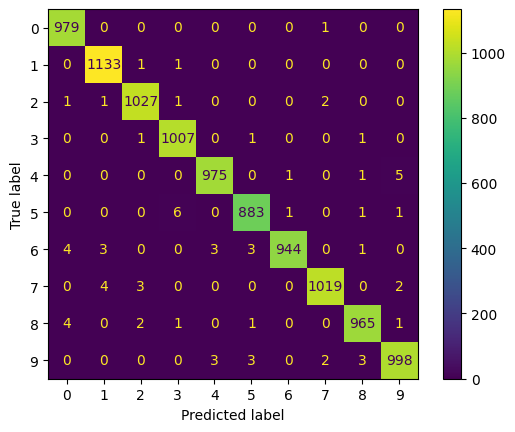

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))

In [34]:
# D)

# MLP
def MLP_model(nodes=None, names=None, activations=[]):
    model = keras.Sequential(name="MLP_model")
    # flattens the input
    model.add(layers.Flatten(input_shape=(28, 28), name="Input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name=name, activation=activation))

    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])

    return model


model = MLP_model(nodes=[10], names=["Output_layer"], activations=["softmax"])
model.summary()

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [36]:
model_deep = MLP_model(nodes=[128, 128, 10], activations=["relu", "relu",
          "softmax"], names=["Hidden_1", "Hidden_2", "Output"])

model_deep.summary()

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model_deep.fit(X_train, y_train, epochs=25, callbacks=[early_stopper], verbose=0)

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



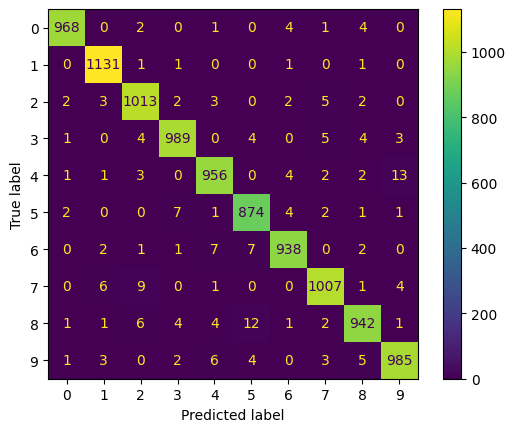

In [ ]:
y_pred = model_deep.predict(X_test)

y_pred = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))

In [42]:
# KNN 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train_knn = X_train.reshape(-1, 28*28) / 255.0
X_test_knn = X_test.reshape(-1, 28*28) / 255.0

knn = KNeighborsClassifier()

knn.fit(X_train_knn, y_train)

y_pred_knn = knn.predict(X_test_knn)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.9688


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



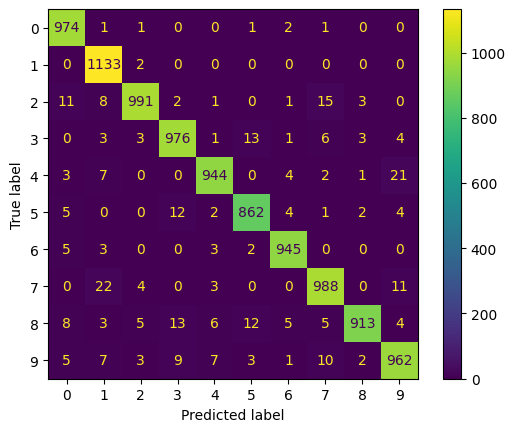

In [44]:
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred_knn))

## Conclusion

Now that i have compared the data between a CNN, MLP and KNN i can draw the conclusion that the CNN got the better accuracy overall, simple explenation would then be that a CNN is built for image classification, learning hierarchies of features like edges, corners and textures. While the MLP flattens the structure of the data, that makes it harder for the model to learn relationships between the pixels. The KNN does not learn features but directly compares pixel values. It performes a lot worse when there are many dimensions. 

# Excersise 2

In [177]:
# A)
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import shutil, pathlib

sns.set_style(("white"))

data = pd.read_csv("../Data/pokemon.csv")

images = pathlib.Path('../Data/pokemons_and_types/Images/Images/')

# Get all image files in the directory
image_files = [file for file in images.iterdir() if file.suffix in {'.png', '.jpg', '.jpeg'}]

# Print the list of image file paths
for image_file in image_files:
    print(image_file)

output_dir = pathlib.Path("Pokemons")

..\Data\pokemons_and_types\Images\Images\abomasnow.png
..\Data\pokemons_and_types\Images\Images\abra.png
..\Data\pokemons_and_types\Images\Images\absol.png
..\Data\pokemons_and_types\Images\Images\accelgor.png
..\Data\pokemons_and_types\Images\Images\aegislash-blade.png
..\Data\pokemons_and_types\Images\Images\aerodactyl.png
..\Data\pokemons_and_types\Images\Images\aggron.png
..\Data\pokemons_and_types\Images\Images\aipom.png
..\Data\pokemons_and_types\Images\Images\alakazam.png
..\Data\pokemons_and_types\Images\Images\alomomola.png
..\Data\pokemons_and_types\Images\Images\altaria.png
..\Data\pokemons_and_types\Images\Images\amaura.png
..\Data\pokemons_and_types\Images\Images\ambipom.png
..\Data\pokemons_and_types\Images\Images\amoonguss.png
..\Data\pokemons_and_types\Images\Images\ampharos.png
..\Data\pokemons_and_types\Images\Images\anorith.png
..\Data\pokemons_and_types\Images\Images\araquanid.png
..\Data\pokemons_and_types\Images\Images\arbok.png
..\Data\pokemons_and_types\Images\I

In [178]:
data.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [179]:
data = data.drop(['Evolution'], axis=1)

In [180]:
data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [181]:
data = data.sort_values(by=['Name'], ascending=True).reset_index(drop=True)

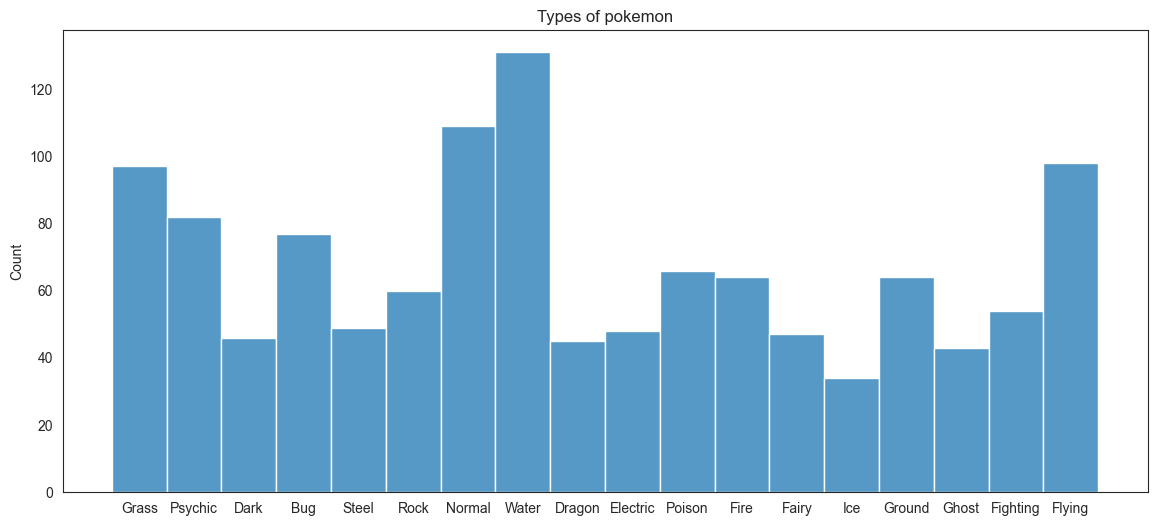

In [182]:
X=data['Type1'].tolist()+data["Type2"].tolist()
plt.figure(figsize=(14, 6))
sns.histplot(x=X)
plt.title('Types of pokemon')
plt.show()

In [186]:
img_name = sorted(images.iterdir())  # Use images.iterdir() for Path objects
img_paths = [str(image) for image in img_name]  # Convert to string if needed

# Assign paths to the 'path' column
data['path'] = img_paths

In [187]:
data.head()

,Name,Type1,Type2,path
0,abomasnow,Grass,Ice,..\Data\pokemons_and_types\Images\Images\aboma...
1,abra,Psychic,NaN,..\Data\pokemons_and_types\Images\Images\abra.png
2,absol,Dark,NaN,..\Data\pokemons_and_types\Images\Images\absol...
3,accelgor,Bug,NaN,..\Data\pokemons_and_types\Images\Images\accel...
4,aegislash-blade,Steel,Ghost,..\Data\pokemons_and_types\Images\Images\aegis...


In [188]:
data.fillna("")

,Name,Type1,Type2,path
0,abomasnow,Grass,Ice,..\Data\pokemons_and_types\Images\Images\aboma...
1,abra,Psychic,,..\Data\pokemons_and_types\Images\Images\abra.png
2,absol,Dark,,..\Data\pokemons_and_types\Images\Images\absol...
3,accelgor,Bug,,..\Data\pokemons_and_types\Images\Images\accel...
4,aegislash-blade,Steel,Ghost,..\Data\pokemons_and_types\Images\Images\aegis...
...,...,...,...,...
804,zoroark,Dark,,..\Data\pokemons_and_types\Images\Images\zoroa...
805,zorua,Dark,,..\Data\pokemons_and_types\Images\Images\zorua...
806,zubat,Poison,Flying,..\Data\pokemons_and_types\Images\Images\zubat...
807,zweilous,Dark,Dragon,..\Data\pokemons_and_types\Images\Images\zweil...


In [189]:
data["Type1"].unique() # 18 olika typer

array(['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal',
       'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice',
       'Ground', 'Ghost', 'Fighting', 'Flying'], dtype=object)

In [190]:
data["Type2"].unique() # 19 olika typer

array(['Ice', nan, 'Ghost', 'Flying', 'Rock', 'Poison', 'Bug', 'Fairy',
       'Psychic', 'Water', 'Ground', 'Steel', 'Fighting', 'Dark', 'Grass',
       'Fire', 'Electric', 'Dragon', 'Normal'], dtype=object)

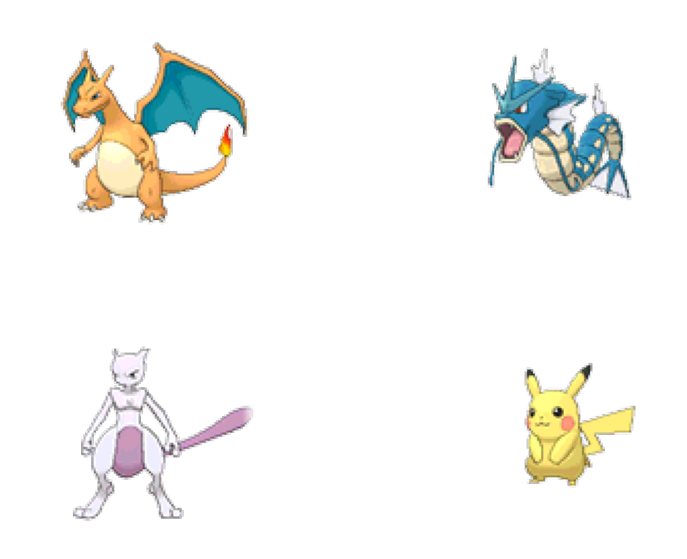

In [191]:
import cv2

fig = plt.figure(figsize=(10, 7))

img1 = plt.imread(f"{images}/charizard.png")
img2 = plt.imread(f"{images}/gyarados.png")
img3 = plt.imread(f"{images}/mewtwo.png")
img4 = plt.imread(f"{images}/pikachu.png")

plt.subplot(2, 2, 1)  
plt.imshow(img1)  
plt.axis('off')  

plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img3)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img4)
plt.axis('off')

plt.show()

In [192]:
Type = []
ind = []

for i in range(data.shape[0]):
    if (data.iloc[i]['Type1']=='Grass') or (data.iloc[i]['Type2']=='Grass'):
        Type.append('Grass')
        ind.append(1)
    elif (data.iloc[i]['Type1']=='Water') or (data.iloc[i]['Type2']=='Water'):
        Type.append('Water')
        ind.append(2)
    elif (data.iloc[i]['Type1']=='Fire') or (data.iloc[i]['Type2']=='Fire'):
        Type.append('Fire')
        ind.append(3)
    elif (data.iloc[i]['Type1']=='Psychic') or (data.iloc[i]['Type2']=='Psychic'):
        Type.append('Psychic')
        ind.append(4)
    elif (data.iloc[i]['Type1']=='Normal') or (data.iloc[i]['Type2']=='Normal'):
        Type.append('Normal')
        ind.append(5)
    elif (data.iloc[i]['Type1']=='Ground') or (data.iloc[i]['Type2']=='Ground'):
        Type.append('Fire')
        ind.append(6)
  
    else:
        Type.append('NaN')
        ind.append('NaN')

In [193]:
data["type"]=Type
data["ind"]=ind
data = data.drop(['Type1', 'Type2', 'Name'], axis=1)
data = data[data['type']!='NaN']

In [194]:
data.head()

,path,type,ind
0,..\Data\pokemons_and_types\Images\Images\aboma...,Grass,1
1,..\Data\pokemons_and_types\Images\Images\abra.png,Psychic,4
7,..\Data\pokemons_and_types\Images\Images\aipom...,Normal,5
8,..\Data\pokemons_and_types\Images\Images\alaka...,Psychic,4
9,..\Data\pokemons_and_types\Images\Images\alomo...,Water,2


Text(0, 0.5, 'Number of images')

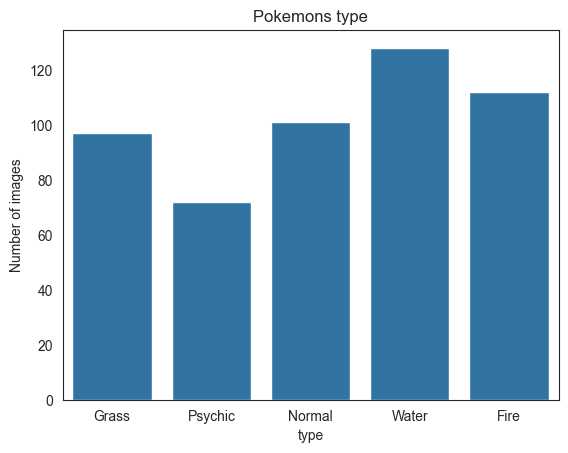

In [195]:
sns.countplot(x=data.type,)
plt.title('Pokemons type')
plt.ylabel('Number of images')

In [198]:
import keras
from keras import layers

inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [213]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=30, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

test_datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagenerator.flow_from_dataframe(
    data, 
    x_col='path', 
    y_col='type',
    target_size=(180, 180), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    data , 
    x_col='path',
    y_col='type',
    target_size=(180, 180),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

test_generator = test_datagenerator.flow_from_dataframe(
    data, 
    x_col='path',
    y_col='type',
    target_size=(180, 180),
    color_mode='rgba', 
    class_mode='categorical',
    batch_size=32, 
    shuffle=False
)

Found 459 validated image filenames belonging to 5 classes.
Found 51 validated image filenames belonging to 5 classes.
Found 510 validated image filenames belonging to 5 classes.


In [214]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape, labels_batch.shape)
    break

(32, 180, 180, 4) (32, 5)


In [204]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [205]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [206]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=callbacks)

c:\Users\maxi7\Deep_Machinelearning\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


ValueError: Input 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 180, 180, 3), found shape=(None, 180, 180, 4)